In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fastNeuron.network import neural_network
from fastNeuron.layers import Dense
import fastNeuron.Activation_funcs as activations
import fastNeuron.Optimizers as Optimizers
from sklearn.model_selection import train_test_split
import fastNeuron.loss_funcs as losses


## Data PreProcessing

#### we only want 2 classes at the beginning
#### lets take 0 and 1 and see if our model can learn how to distinguish between both

In [2]:
def preprocess():


    import tensorflow_datasets as tfds
    # load the mnist dataset
    ds,info = tfds.load(name='mnist',split='train',with_info=True)
    images = []
    labels = []
    for ex in tfds.as_numpy(ds):
        np_image,np_label = ex['image'],ex['label']
        images.append(np_image)
        labels.append(np_label)
    # change the labels to be one hot encoding
    from tensorflow.keras.utils import to_categorical
    one_hot_labels = to_categorical(labels)
    # make images a numpy array
    images = np.array(images)

    return images , one_hot_labels




In [3]:
IMAGES , LABELS = preprocess()

/Users/enesbayram/Documents/fastNeuron/examples/example/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# get the indices of 0 and 1 
zeros = np.where(LABELS[:,0] == 1)
ones = np.where(LABELS[:,1] == 1)

In [5]:
# only take images at these indices
zeros_images = IMAGES[zeros]
ones_images = IMAGES[ones]
zeros_labels = LABELS[zeros]
ones_labels = LABELS[ones]

In [6]:
reduced_images = np.concatenate((zeros_images,ones_images),axis=0)
reduced_labels = np.concatenate((zeros_labels,ones_labels),axis=0)
reduced_labels = np.concatenate((reduced_labels[:,0].reshape(-1,1),reduced_labels[:,1].reshape(-1,1)),axis=1)

In [7]:
# shuffle images and labels in unison
shuffler = np.arange(reduced_images.shape[0])
np.random.shuffle(shuffler)
reduced_images = reduced_images[shuffler]
reduced_labels = reduced_labels[shuffler]

In [8]:
flattened_normalized = []
# flatten images
for image in reduced_images:

    flattened_normalized.append((image.flatten()/255))
    
flattened = np.array(flattened_normalized)

## Now that our dataset is ready we will create a neural network to give it the images

In [9]:
model = neural_network()

model = model.sequential(
    [
        Dense(reduced_images.shape[1] * reduced_images.shape[2],20,activations.relu()),
        Dense(20,20,activations.relu()),
        Dense(20,reduced_labels.shape[1],activations.softmax())
    ]
)

In [10]:
model.compile(
    optimizer=Optimizers.MiniBatchGradientDescent(),
    Cost=losses.CategoricalCrossEntropy()
)

In [11]:
model.summary()

Summary of the neural network

--------------------------------------------------

layer with 20 units, 784 inputs and ReLU activation function

--------------------------------------------------

layer with 20 units, 20 inputs and ReLU activation function

--------------------------------------------------

layer with 2 units, 20 inputs and Softmax activation function

--------------------------------------------------

input size : 784
output size : 2
optimizer : Mini-Batch Gradient Descent
cost function : Categorical Cross Entropy


In [12]:
model,costs = model.fit(flattened,reduced_labels,learning_rate=0.0001,epochs=100)




0 cost : 980.7635126693671 accuracy : 99.67%
10 cost : 91.8459264233489 accuracy : 99.79%
20 cost : 64.1878635365035 accuracy : 99.87%
30 cost : 51.79274954364523 accuracy : 99.88%
40 cost : 44.044049998862285 accuracy : 99.9%
50 cost : 38.55739782422713 accuracy : 99.91%
60 cost : 34.36730041465491 accuracy : 99.92%
70 cost : 30.931895274064107 accuracy : 99.93%
80 cost : 27.996443627151372 accuracy : 99.93%
90 cost : 25.45460437913272 accuracy : 99.93%
 cost : 23.426526613514692 accuracy : 99.93%


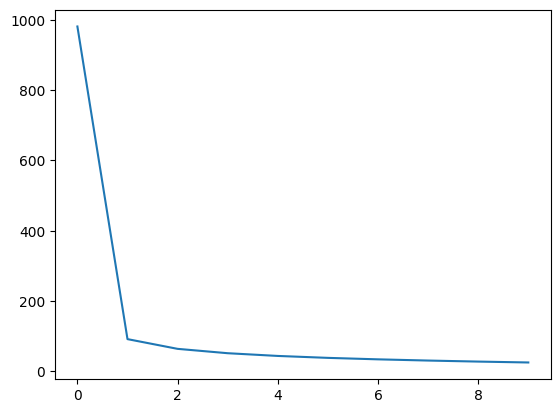

In [13]:
plt.plot(costs)

In [14]:
predictions = model.predict(flattened)

In [15]:
accuracy = (np.sum((predictions[:,0] == reduced_labels[:,0]).astype(int)) / reduced_labels.shape[0]) * 100
print(f"accuracy : {accuracy:.2f}%")

accuracy : 99.93%


## see which images did the model predict incorrectly

In [16]:
# get the indices of the wrong predictions
wrong_indices = np.where(predictions[:,0] != reduced_labels[:,0])[0]

In [17]:
# get the labels and images of the wrong ones
wrong_images = reduced_images[wrong_indices]
wrong_labels = reduced_labels[wrong_indices]


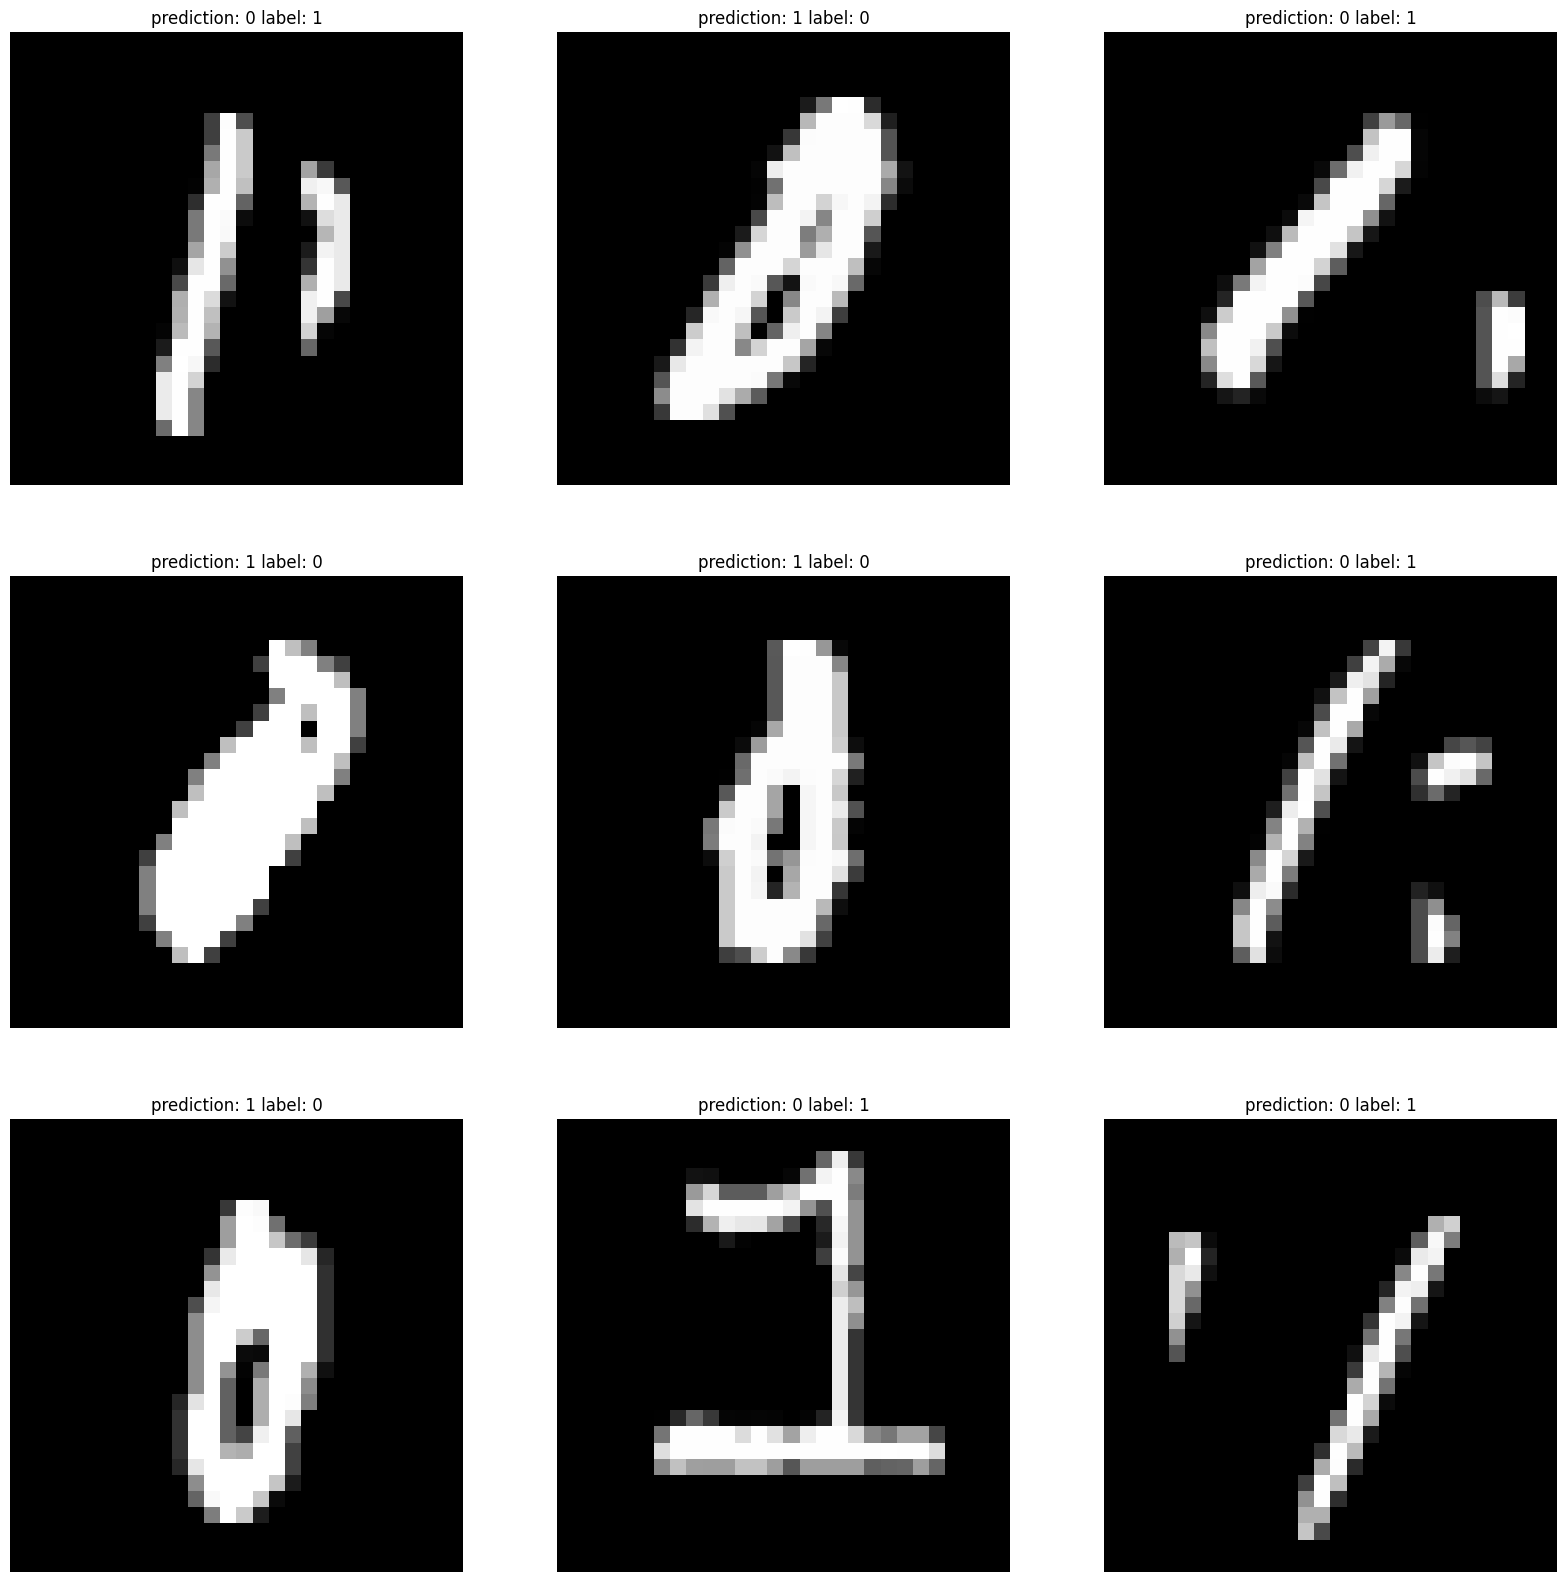

In [18]:
# we will plot each 3 images in a row

# determine how many rows and columns we need
rows = 3
columns = np.ceil(wrong_indices.shape[0]/rows).astype(int)


fig, axes = plt.subplots(rows, columns, figsize=(20, 20))
index = 0
for row in range(rows):
    for col in range(columns):
        if index == wrong_indices.shape[0]:
            break
        axes[row, col].imshow(wrong_images[index],cmap="gray")
        axes[row, col].set_title(f"prediction: {(predictions[wrong_indices[index]][0] != 1).astype(int)} label: {(wrong_labels[index][0] != 1).astype(int)}")
        axes[row, col].axis('off')
        index += 1